# HumanActivityRecognition

<br>

Este projeto é para construir um modelo que prevê as atividades humanas, como Caminhar, Caminhar_para_cima, Caminhar_para_baixo, Sentado, em pé ou Deitado.

Este conjunto de dados é coletado de 30 pessoas (chamadas de sujeitos neste conjunto de dados), realizando diferentes atividades com um smartphone na cintura. Os dados são registrados com a ajuda de sensores (acelerômetro e giroscópio) naquele smartphone. Este experimento foi gravado em vídeo para rotular os dados manualmente.

## Como os dados foram registrados

Usando os sensores (giroscópio e acelerômetro) em um smartphone, eles capturaram 'aceleração linear de 3 eixos' (_tAcc-XYZ_) do acelerômetro e 'velocidade angular de 3 eixos' (_tGyro-XYZ_) do giroscópio com várias variações.

> o prefixo 't' nessas métricas denota tempo.

> o sufixo 'XYZ' representa sinais triaxiais nas direções X, Y e Z.

### Nomes de recursos

1. Esses sinais de sensor são pré-processados ​​aplicando filtros de ruído e, em seguida, amostrados em janelas de largura fixa (janelas deslizantes) de 2,56 segundos cada com sobreposição de 50%. Ou seja, cada janela tem 128 leituras.

2. De cada janela, um vetor de recursos foi obtido calculando variáveis ​​do domínio do tempo e da frequência.
> Em nosso conjunto de dados, cada ponto de dados representa uma janela com leituras diferentes
3. O sinal de aceleração foi separado em sinais de aceleração de Corpo e Gravidade (___tBodyAcc-XYZ___ e ___tGravityAcc-XYZ___) usando algum filtro passa-baixo com frequência de canto de 0,3 Hz.

4. Depois disso, a aceleração linear do corpo e a velocidade angular foram derivadas no tempo para obter sinais de _jerk_ (___tBodyAccJerk-XYZ___ e ___tBodyGyroJerk-XYZ___).

5. A magnitude desses sinais tridimensionais foi calculada usando a norma euclidiana. Essas magnitudes são representadas como recursos com nomes como _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ e _tBodyGyroJerkMag_.

6. Finalmente, obtivemos sinais de domínio de frequência de alguns dos sinais disponíveis aplicando uma FFT (Fast Fourier Transform). Esses sinais obtidos foram rotulados com ___prefix 'f'___ assim como os sinais originais com ___prefix 't'___. Esses sinais são rotulados como ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. Esses são os sinais que obtivemos até agora.
+ tBodyAcc-XYZ
+ tGravityAcc-XYZ
+ tBodyAccJerk-XYZ
+ tBodyGyro-XYZ
+ tBodyGyroJerk-XYZ
+ tBodyAccMag
+ tGravityAccMag
+ tBodyAccJerkMag
+ tBodyGyroMag
+ tBodyGyroJerkMag
+ fBodyAcc-XYZ
+ fBodyAccJerk-XYZ
+ fBodyGyro-XYZ
+ fBodyAccMag
+ fBodyAccJerkMag
+ fBodyGyroMag
+ fBodyGyroJerkMag

8. Podemos estimar algum conjunto de variáveis ​​a partir dos sinais acima. Ou seja, estimaremos as seguintes propriedades em cada sinal que registramos até agora.

+ ___mean()___: Valor médio
+ ___std()___: Desvio padrão
+ ___mad()___: Desvio absoluto mediano
+ ___max()___: Maior valor na matriz
+ ___min()___: Menor valor na matriz
+ ___sma()___: Área de magnitude do sinal
+ ___energy()___: Medida de energia. Soma dos quadrados dividida pelo número de valores.
+ ___iqr()___: Intervalo interquartil
+ ___entropy()___: Entropia do sinal
+ ___arCoeff()___: Coeficientes de autorregressão com ordem de Burg igual a 4
+ ___correlation()___: coeficiente de correlação entre dois sinais
+ ___maxInds()___: índice do componente de frequência com maior magnitude
+ ___meanFreq()___: Média ponderada dos componentes de frequência para obter uma frequência média
+ ___skewness()___: assimetria do sinal do domínio da frequência
+ ___kurtosis()___: curtose do sinal do domínio da frequência
+ ___bandsEnergy()___: Energia de um intervalo de frequência dentro dos 64 compartimentos da FFT de cada janela.
+ ___angle()___: Ângulo entre dois vetores.

9. Podemos obter alguns outros vetores tomando a média de sinais em uma única amostra de janela. Eles são usados ​​na variável angle()'
`
+ gravityMean
+ tBodyAccMean
+ tBodyAccJerkMean
+ tBodyGyroMean
+ tBodyGyroJerkMean

### Y_Labels(Encoded)
+ No conjunto de dados, os Y_labels são representados como números de 1 a 6 como seus identificadores.

- ANDANDO como __1__
- ANDANDO_NO_ESCALÇO_CIMA como __2__
- ANDANDO_NO_BAIXO como __3__
- SENTADO como __4__
- EM PÉ como __5__
- DEITADO como __6__

## Os dados de treinamento e teste foram separados
- As leituras de ___70%___ dos voluntários foram tomadas como ___dados de teste___ e as gravações dos ___30%___ sujeitos restantes foram tomadas para ___dados de teste___

## Dados

* Todos os dados estão presentes na pasta 'UCI_HAR_dataset/' no diretório de trabalho atual.
- Os nomes dos recursos estão presentes em 'UCI_HAR_dataset/features.txt'
- ___Dados do trem___
- 'UCI_HAR_dataset/train/X_train.txt'
- 'UCI_HAR_dataset/train/subject_train.txt'
- 'UCI_HAR_dataset/train/y_train.txt'
- ___Dados do teste___
- 'UCI_HAR_dataset/test/X_test.txt'
- 'UCI_HAR_dataset/test/subject_test.txt'
- 'UCI_HAR_dataset/test/y_test.txt'

## Tamanho dos dados:
> 27 MB

# Visão geral rápida do conjunto de dados:


* As leituras do acelerômetro e do giroscópio são feitas em 30 voluntários (chamados de sujeitos) enquanto realizam as 6 atividades a seguir.

1. Caminhando
2. Caminhando em cima
3. Caminhando em baixo
4. Em pé
5. Sentado
6. Deitado.

* As leituras são divididas em uma janela de 2,56 segundos com 50% de sobreposição.

* As leituras do acelerômetro são divididas em leituras de aceleração da gravidade e aceleração do corpo,
que têm componentes x, y e z cada.

* As leituras do giroscópio são a medida de velocidades angulares que têm componentes x, y e z.

* Os sinais de solavanco são calculados para leituras de BodyAcceleration.

* As transformadas de Fourier são feitas nas leituras de tempo acima para obter leituras de frequência.

* Agora, em todas as leituras de sinal base, média, máx., mad, sma, arcoeficiente, bandas de energia, entropia etc., são calculados para cada janela.

* Obtemos um vetor de características de 561 características e essas características são fornecidas no conjunto de dados.

* Cada janela de leituras é um ponto de dados de 561 características.

## Estrutura do problema

* Dados de 30 sujeitos (voluntários) são divididos aleatoriamente em 70% (21) de teste e 30% (7) de dados de treinamento.
* Cada ponto de dados corresponde a uma das 6 atividades.

## Declaração do Problema

+ Dado um novo ponto de dados, temos que prever a Atividade

## Dados de Treinamento

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv(r'C:\Users\mique\Downloads\train.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
train.shape
print(train.columns.to_list)


<bound method IndexOpsMixin.tolist of Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)>


## Dados de Teste

In [4]:
test = pd.read_csv(r'C:\Users\mique\Downloads\test.csv')
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
test.shape

(2947, 563)

# Data Cleaning

## 1. Check for Duplicates

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


As we can see there are no duplicates in the train and test dataset

## 2. Checking for NaN/null values

In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In this this dataset we should not be worried about null values because there are no null values   

## 3. Check for data imbalance

In [8]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

<Axes: title={'center': 'Data provided by each user'}, xlabel='subject', ylabel='count'>

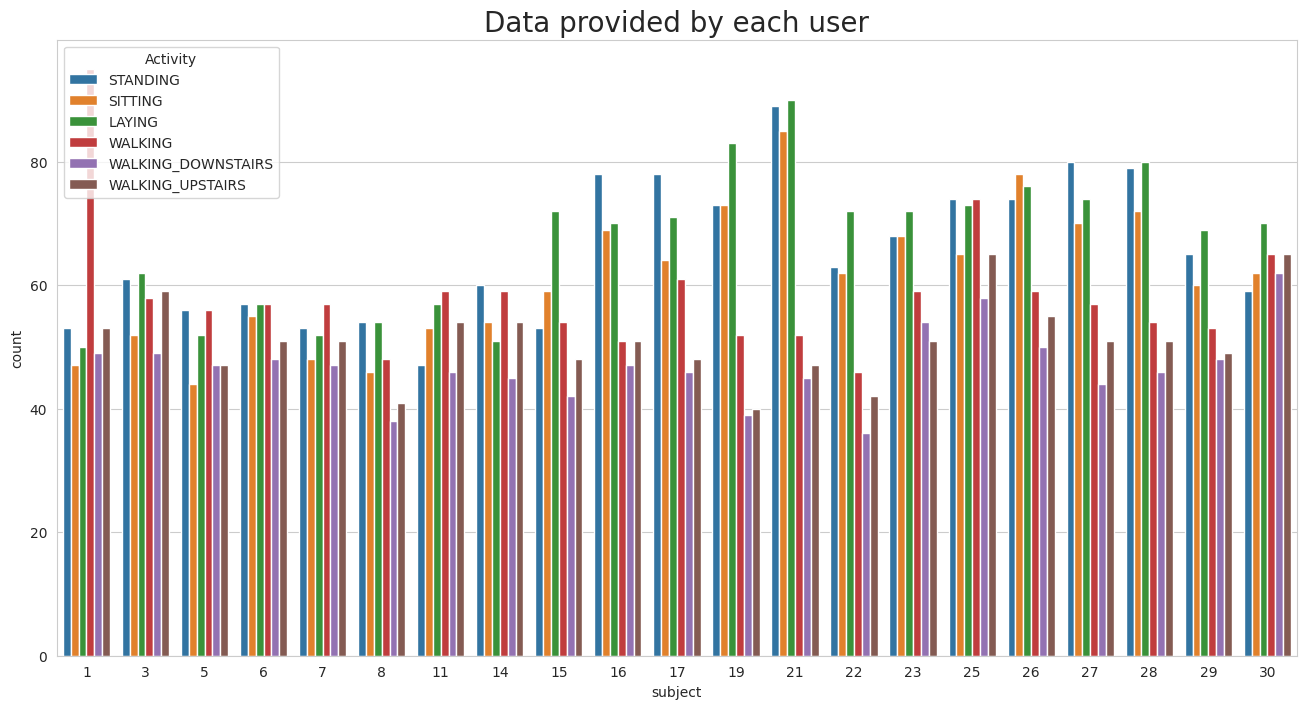

In [9]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)


As we can see We have got almost same number of reading from all the subjects means there are not sygnificant difference in reading then we should not worry about it

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

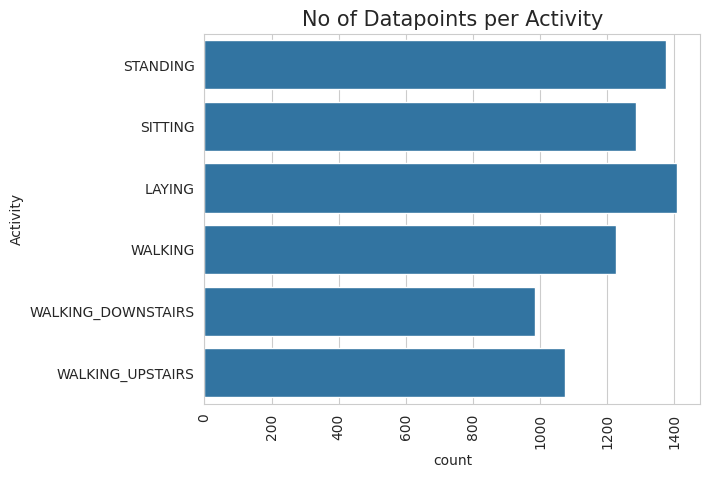

In [10]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.Activity)
plt.xticks(rotation=90)

### Observation
Our data is well balanced (almost)

## 4. Changing feature names 

we will remove the commas and brackets to out features so that we can apply directly

In [11]:
train.columns = train.columns.str.replace('()','')
train.columns = train.columns.str.replace('-','')
train.columns = train.columns.str.replace(',','')
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angle(tBodyAccMeangravity)',
       'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [12]:
test.columns = train.columns
test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angle(tBodyAccMeangravity)',
       'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

## 5. Save this dataframe in a csv files

save our data to csv file for future prediction ,we will use these files when we will do predictions in the next notebook

In [13]:
train.to_csv('f_train.csv', index=False)
test.to_csv('f_test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

C:\Users\mique\Downloads\TopicosAvancados2710\venv\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\mique\Downloads\TopicosAvancados2710\venv\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

Text(0.2, 9, 'Moving Activities')

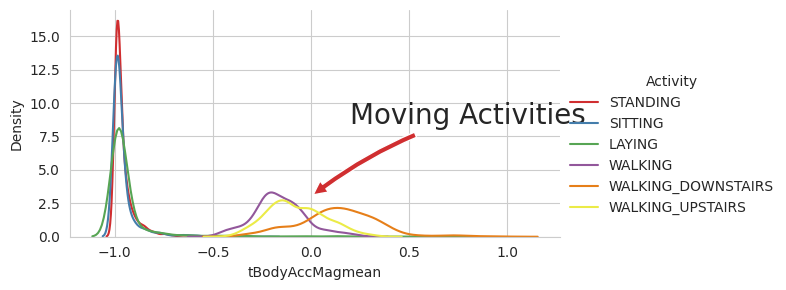

In [14]:
sns.set_palette("Set1", desat=0.80)

facetgrid = sns.FacetGrid(train, hue='Activity',aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()

plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,va='center', ha='left',
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,va='center', ha='left',
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))


As we can clearly see the difference between stationary activities and Moving Activities

as per above pdf distribution we can look closer by dividing these pdfs 

C:\Users\mique\AppData\Local\Temp\ipykernel_26768\3538974692.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
C:\Users\mique\AppData\Local\Temp\ipykernel_26768\3538974692.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

<Axes: title={'center': 'Dynamic Activities(closer view)'}, xlabel='tBodyAccMagmean', ylabel='Density'>

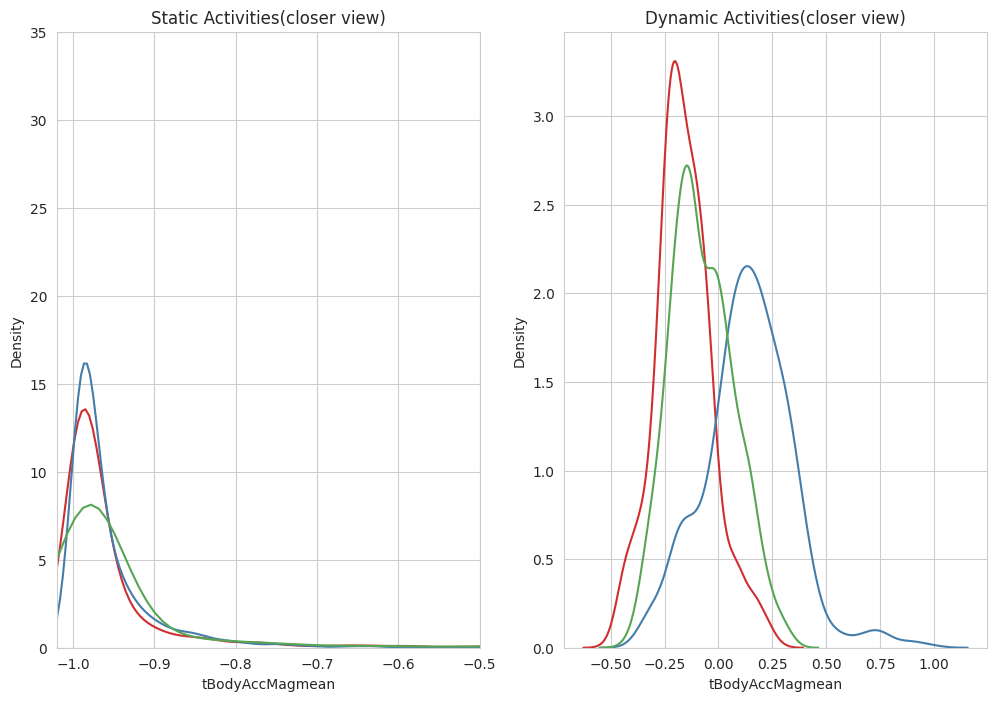

In [15]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]



plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMagmean'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMagmean'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMagmean'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'],hist = False, label = 'Laying')

### 3. Magnitude of an acceleration can saperate it well

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

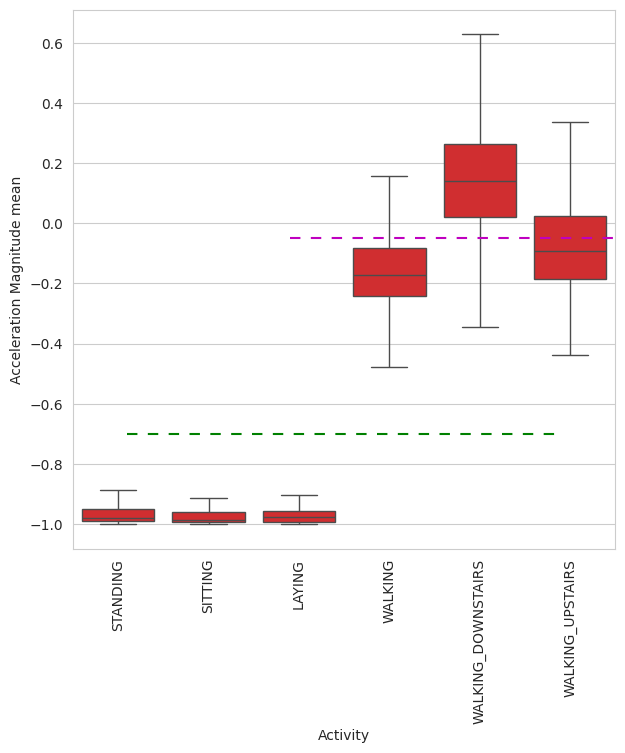

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)

__Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

In [17]:
train.columns.to_list()

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

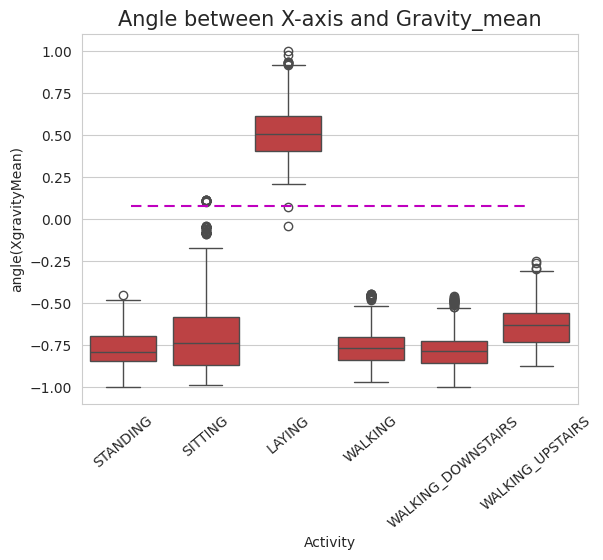

In [18]:
sns.boxplot(x='Activity', y='angle(XgravityMean)', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)

__Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

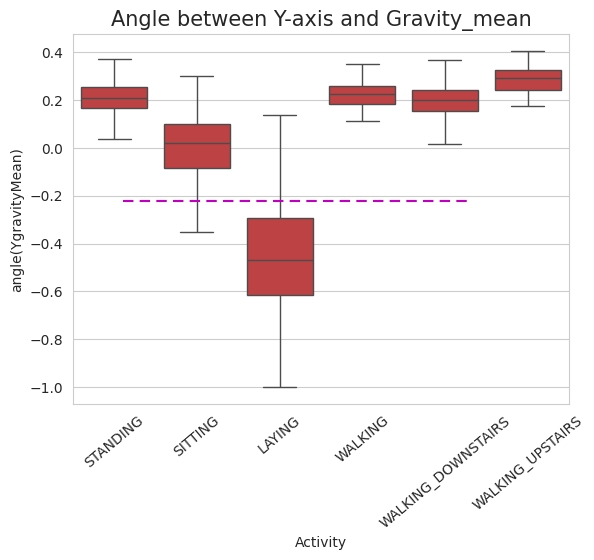

In [19]:
sns.boxplot(x='Activity', y='angle(YgravityMean)', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [20]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Here we will see these datapoints in 2 dimensions and try to observe the behaviour of the datapoints

In [21]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 1.193s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 107.1750946, gradient norm = 0.0389215 (50 iterations in 2.686s)
[t-SNE] Iteration 100: error = 95.6713409, gradient norm = 0.0147949 (50 iterations in 

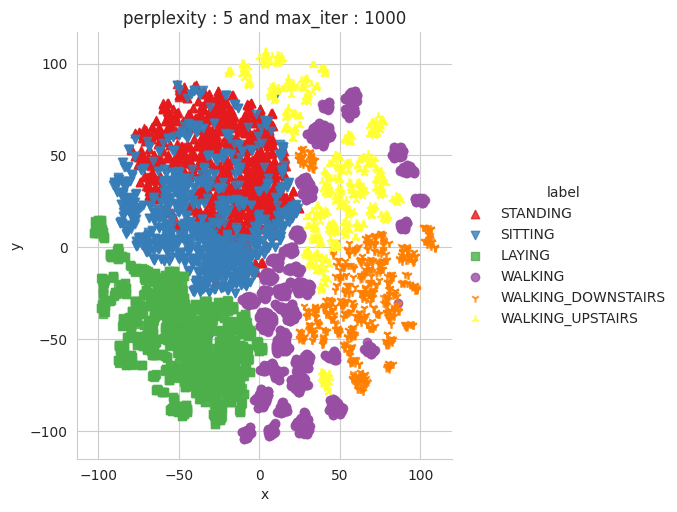

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 0.926s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.111s
[t-SNE] Iteration 50: error = 97.8980942, gradient norm = 0.0360830 (50 iterations in 3.271s)
[t-SNE] Iteration 100: error = 88.9413528, gradient norm = 0.0102175 (50 iteration

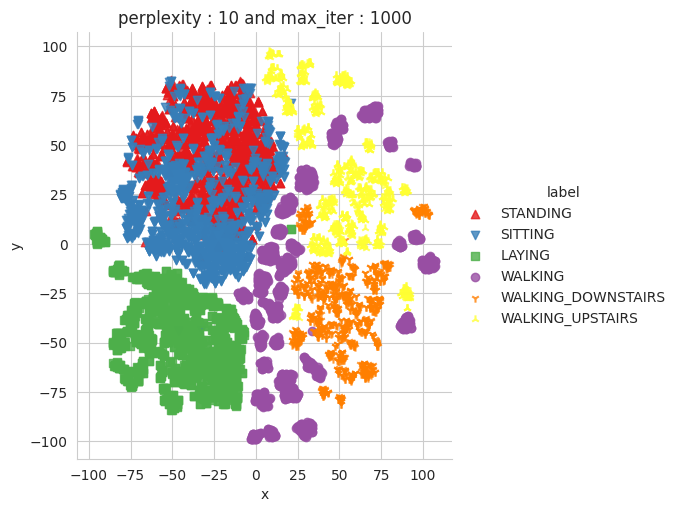

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 1.004s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.205s
[t-SNE] Iteration 50: error = 89.2914124, gradient norm = 0.0303446 (50 iterations in 3.903s)
[t-SNE] Iteration 100: error = 82.9596939, gradient norm = 0.0075926 (50 iteration

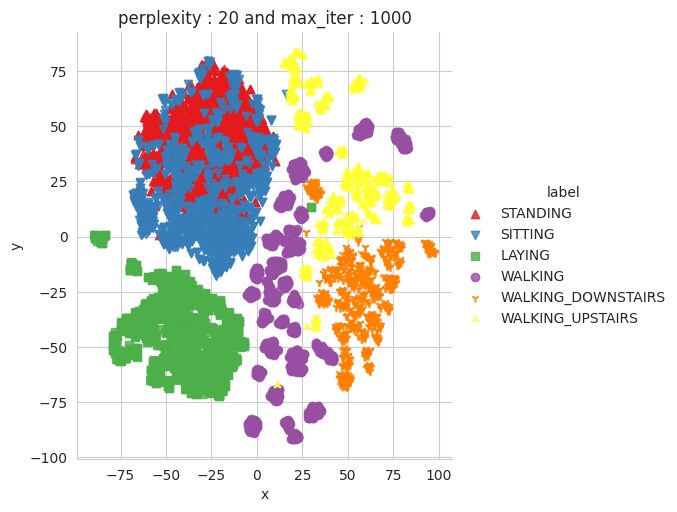

Done


In [22]:
X_pre_tsne = train.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[5,10,20])

### ***Conclusion***

-->As we can see all the features except standing and sitting can be seperated very easily 

--> Model will probably be confused between standing and sitting

# Novas questões de Análise Exploratória

#  Como a variabilidade da magnitude da aceleração (tBodyAccMagmean) difere entre as diferentes atividades?

C:\Users\mique\AppData\Local\Temp\ipykernel_26768\1025252715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Activity', y='tBodyAccMagmean', data=train, showfliers=True, palette="Set2")


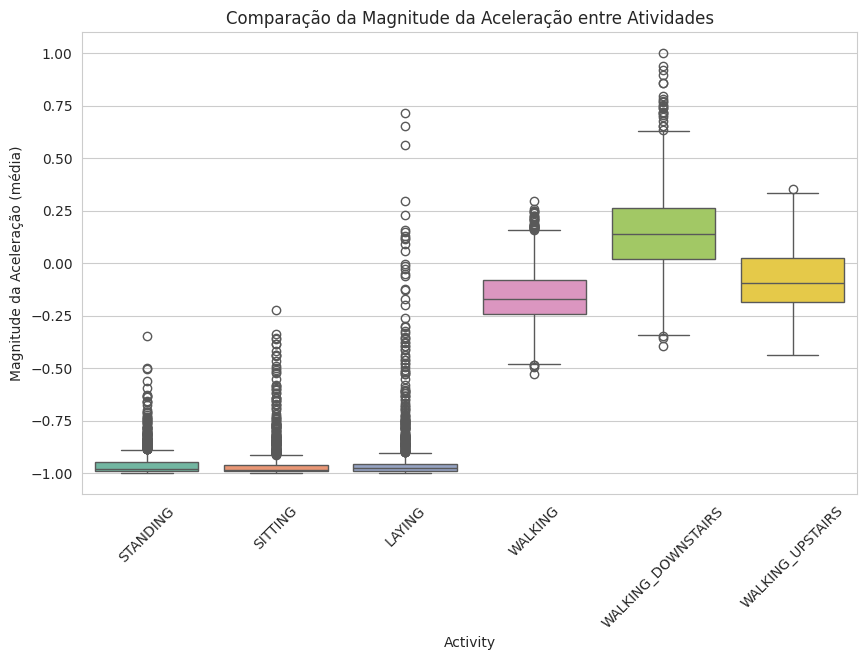

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Activity', y='tBodyAccMagmean', data=train, showfliers=True, palette="Set2")
plt.title('Comparação da Magnitude da Aceleração entre Atividades')
plt.ylabel('Magnitude da Aceleração (média)')
plt.xticks(rotation=45)
plt.show()


# Qual é a distribuição da aceleração média nos eixos X, Y e Z (tBodyAccmeanX, tBodyAccmeanY, tBodyAccmeanZ) entre as diferentes atividades?

C:\Users\mique\AppData\Local\Temp\ipykernel_26768\338689348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Activity', y='tBodyAccmeanX', palette="Set1")
C:\Users\mique\AppData\Local\Temp\ipykernel_26768\338689348.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Activity', y='tBodyAccmeanY', palette="Set1")
C:\Users\mique\AppData\Local\Temp\ipykernel_26768\338689348.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='Activity', y='tBodyAccmeanZ', palette="Set1")


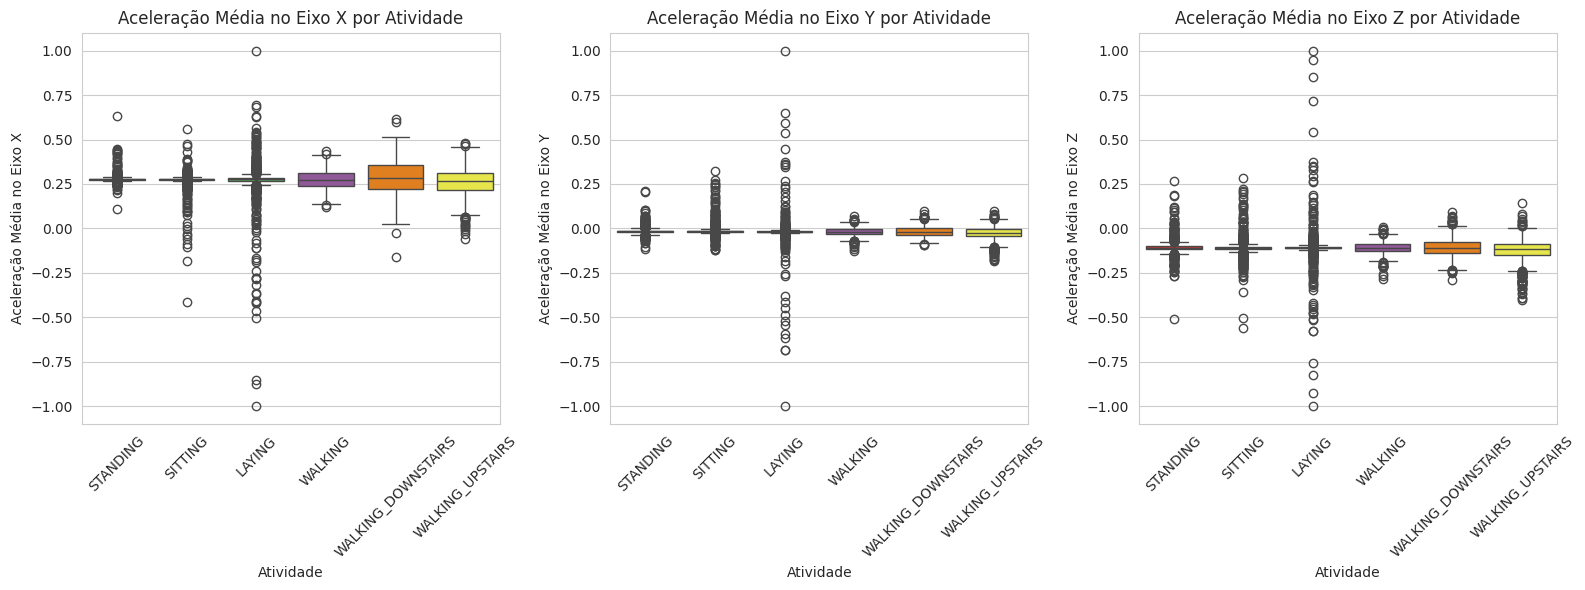

In [41]:
# Gráfico de boxplot para aceleração média em X, Y e Z
plt.figure(figsize=(16, 6))

# Aceleração média no eixo X
plt.subplot(1, 3, 1)
sns.boxplot(data=train, x='Activity', y='tBodyAccmeanX', palette="Set1")
plt.title('Aceleração Média no Eixo X por Atividade')
plt.xlabel('Atividade')
plt.ylabel('Aceleração Média no Eixo X')
plt.xticks(rotation=45)

# Aceleração média no eixo Y
plt.subplot(1, 3, 2)
sns.boxplot(data=train, x='Activity', y='tBodyAccmeanY', palette="Set1")
plt.title('Aceleração Média no Eixo Y por Atividade')
plt.xlabel('Atividade')
plt.ylabel('Aceleração Média no Eixo Y')
plt.xticks(rotation=45)

# Aceleração média no eixo Z
plt.subplot(1, 3, 3)
sns.boxplot(data=train, x='Activity', y='tBodyAccmeanZ', palette="Set1")
plt.title('Aceleração Média no Eixo Z por Atividade')
plt.xlabel('Atividade')
plt.ylabel('Aceleração Média no Eixo Z')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

